# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.patches import Rectangle

from PIL import Image
import tensorflow as tf
import numpy as np

%matplotlib inline

In [2]:
dataset = get_dataset("/home/workspace/data/waymo/training_and_validation/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 97
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    name = batch['filename']
    img  = batch['image'].numpy()
    img_shape = img.shape
    bboxes = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes'].numpy()
    
    _, ax=plt.subplots(1,figsize=(20,10))
    colormap={1:[1, 0, 0], 2:[0, 0, 1], 4:[0, 1, 0]}
    
    for cl ,bb in zip(classes, bboxes):
        y1, x1, y2, x2 = bb
        y1 = y1 * img_shape[0]
        x1 = x1 * img_shape[1]
        y2 = y2 * img_shape[0]
        x2 = x2 * img_shape[1]
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor=colormap[cl])
        ax.add_patch(rec)
        
    imgplot = plt.imshow(img)
    plt.show()
    
    
    
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

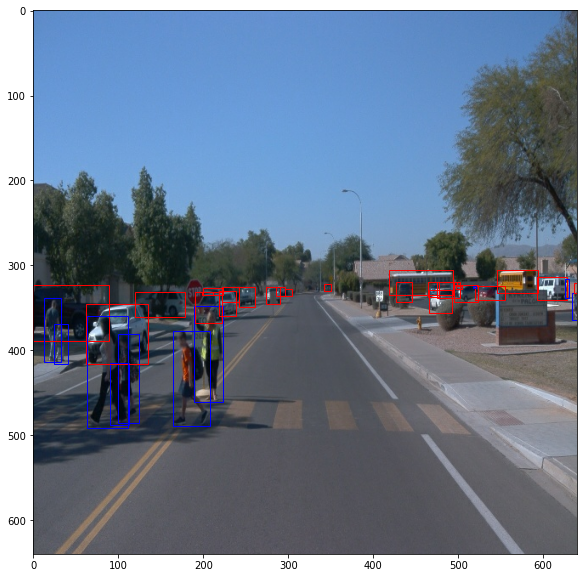

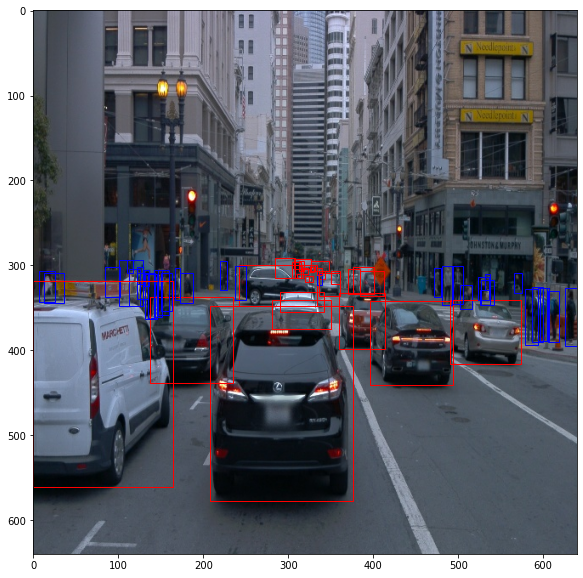

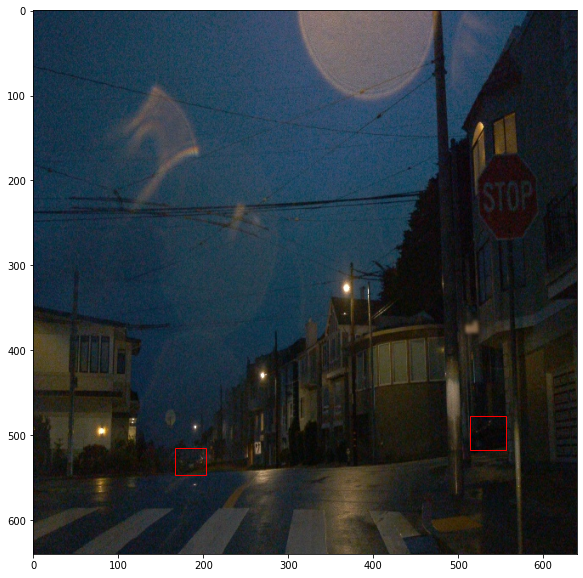

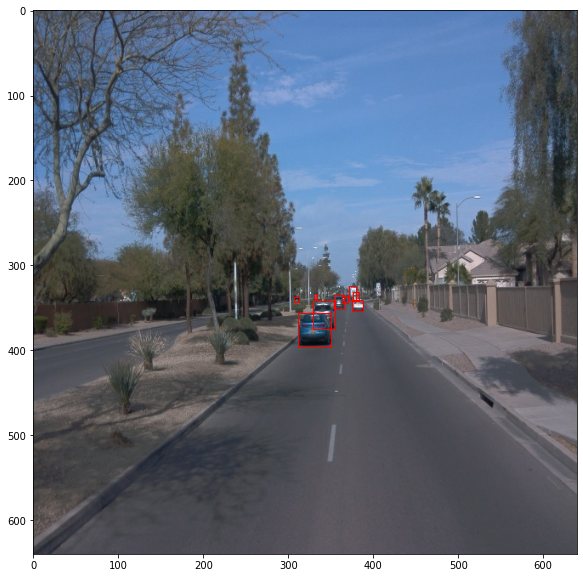

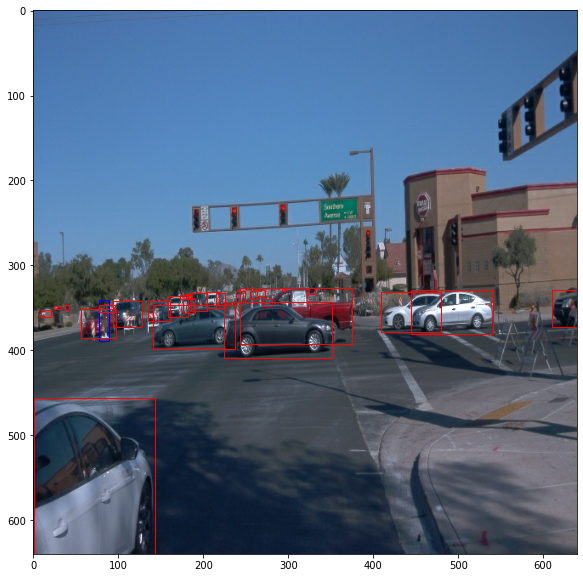

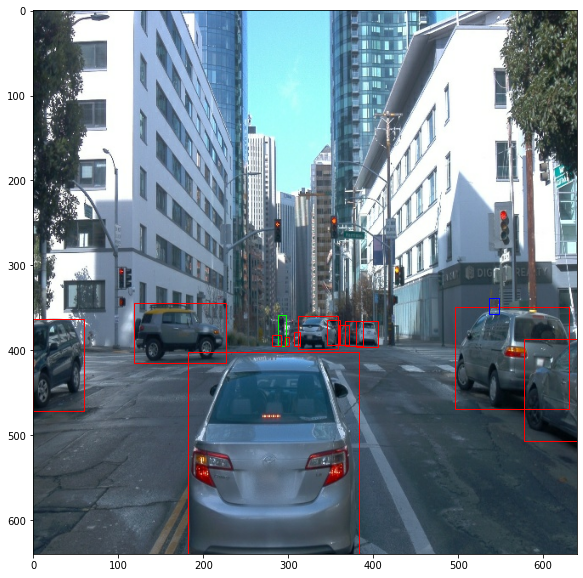

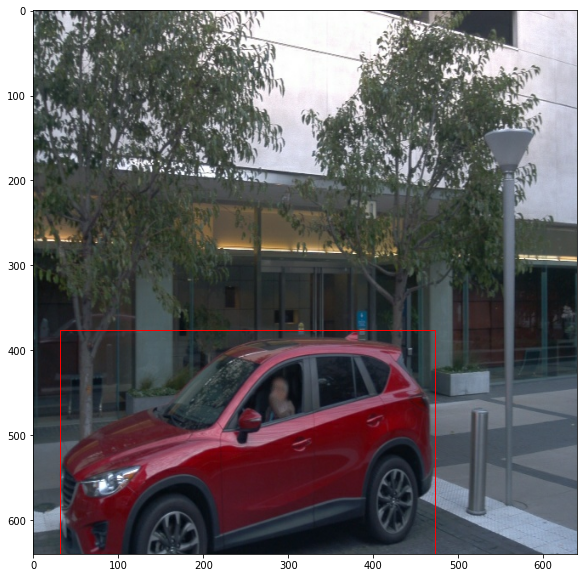

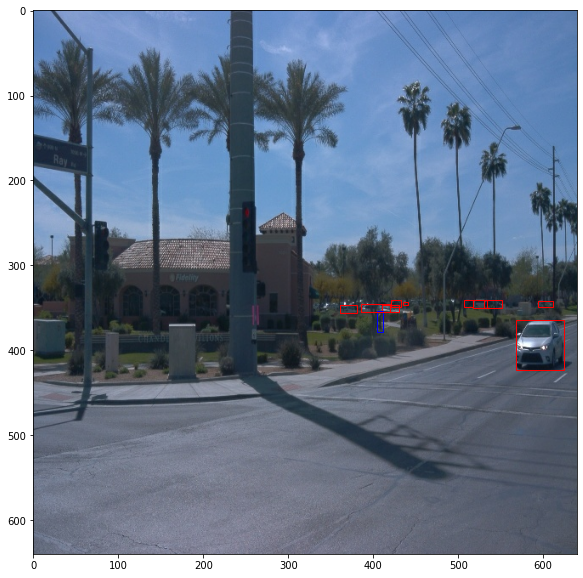

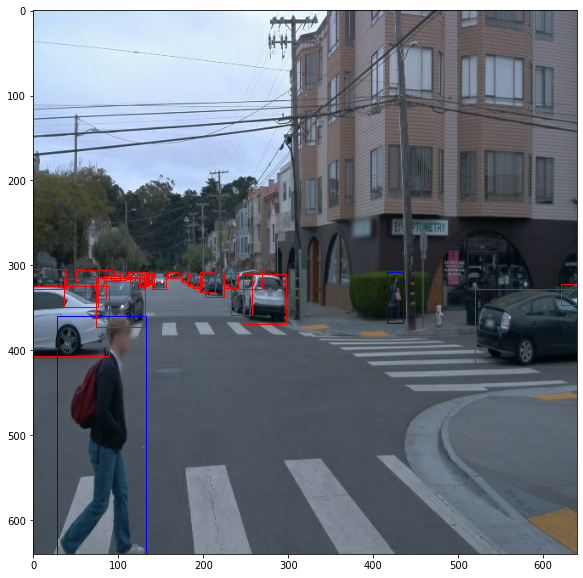

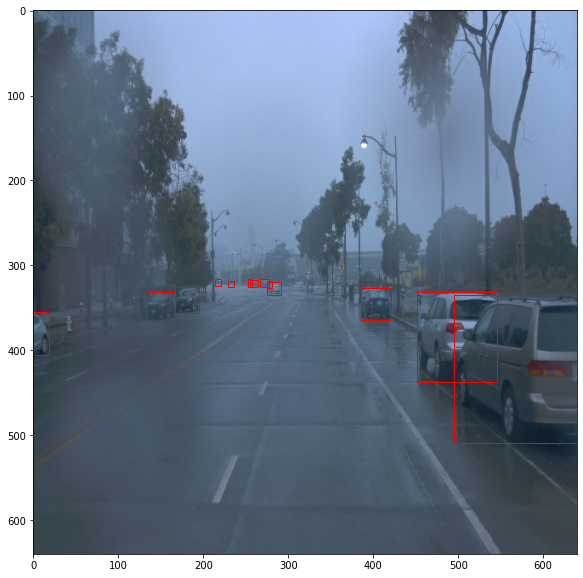

In [4]:
## STUDENT SOLUTION HERE
batches = dataset.take(10)

for batch in batches:
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

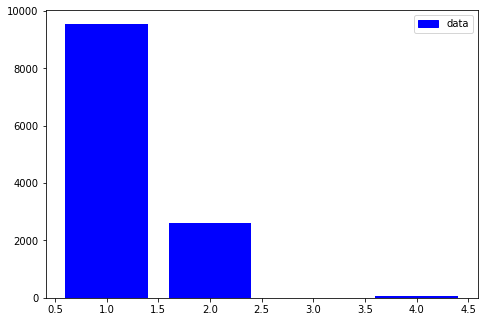

In [10]:
def count_classes(instance, veh_count, ped_count, cyc_count):
    classes=instance['groundtruth_classes'].numpy()
    for i in classes:
        if i == 1:
            veh_count += 1
        elif i == 2:
            ped_count += 1
        else:
            cyc_count += 1
    return veh_count, ped_count, cyc_count


batch_dataset = dataset.take(500)

veh_count_data, ped_count_data, cyc_count_data = 0, 0, 0
for batch in batch_dataset:
    veh_count_tmp, ped_count_tmp, cyc_count_tmp = count_classes(batch,0,0,0)
    veh_count_data += veh_count_tmp
    ped_count_data += ped_count_tmp
    cyc_count_data += cyc_count_tmp

    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels=[1,2,4]

vals=[veh_count_data, ped_count_data, cyc_count_data]
ax.bar(labels,vals,color='b')

colors={'data':'blue'}
labels=list(colors.keys())
handles= [plt.Rectangle((0,0),1,1,color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()
    
    
    